In [19]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [20]:
#load the data file 
data = Path('clean_train.csv')
titanic_df = pd.read_csv(data)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [21]:
# Segment the features from the target
X = titanic_df.drop("Survived", axis=1)
y = titanic_df['Survived']

In [22]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [24]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [25]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()

In [27]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)

In [28]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

In [29]:
# Calculating the confusion matrix
dt_cm = confusion_matrix(y_test, predictions)
dt_cm_df = pd.DataFrame(
    dt_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [30]:
# Displaying results
print("Confusion Matrix")
display(dt_cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,111,32
Actual 1,18,62


Accuracy Score : 0.7757847533632287
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       143
           1       0.66      0.78      0.71        80

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.76       223
weighted avg       0.79      0.78      0.78       223



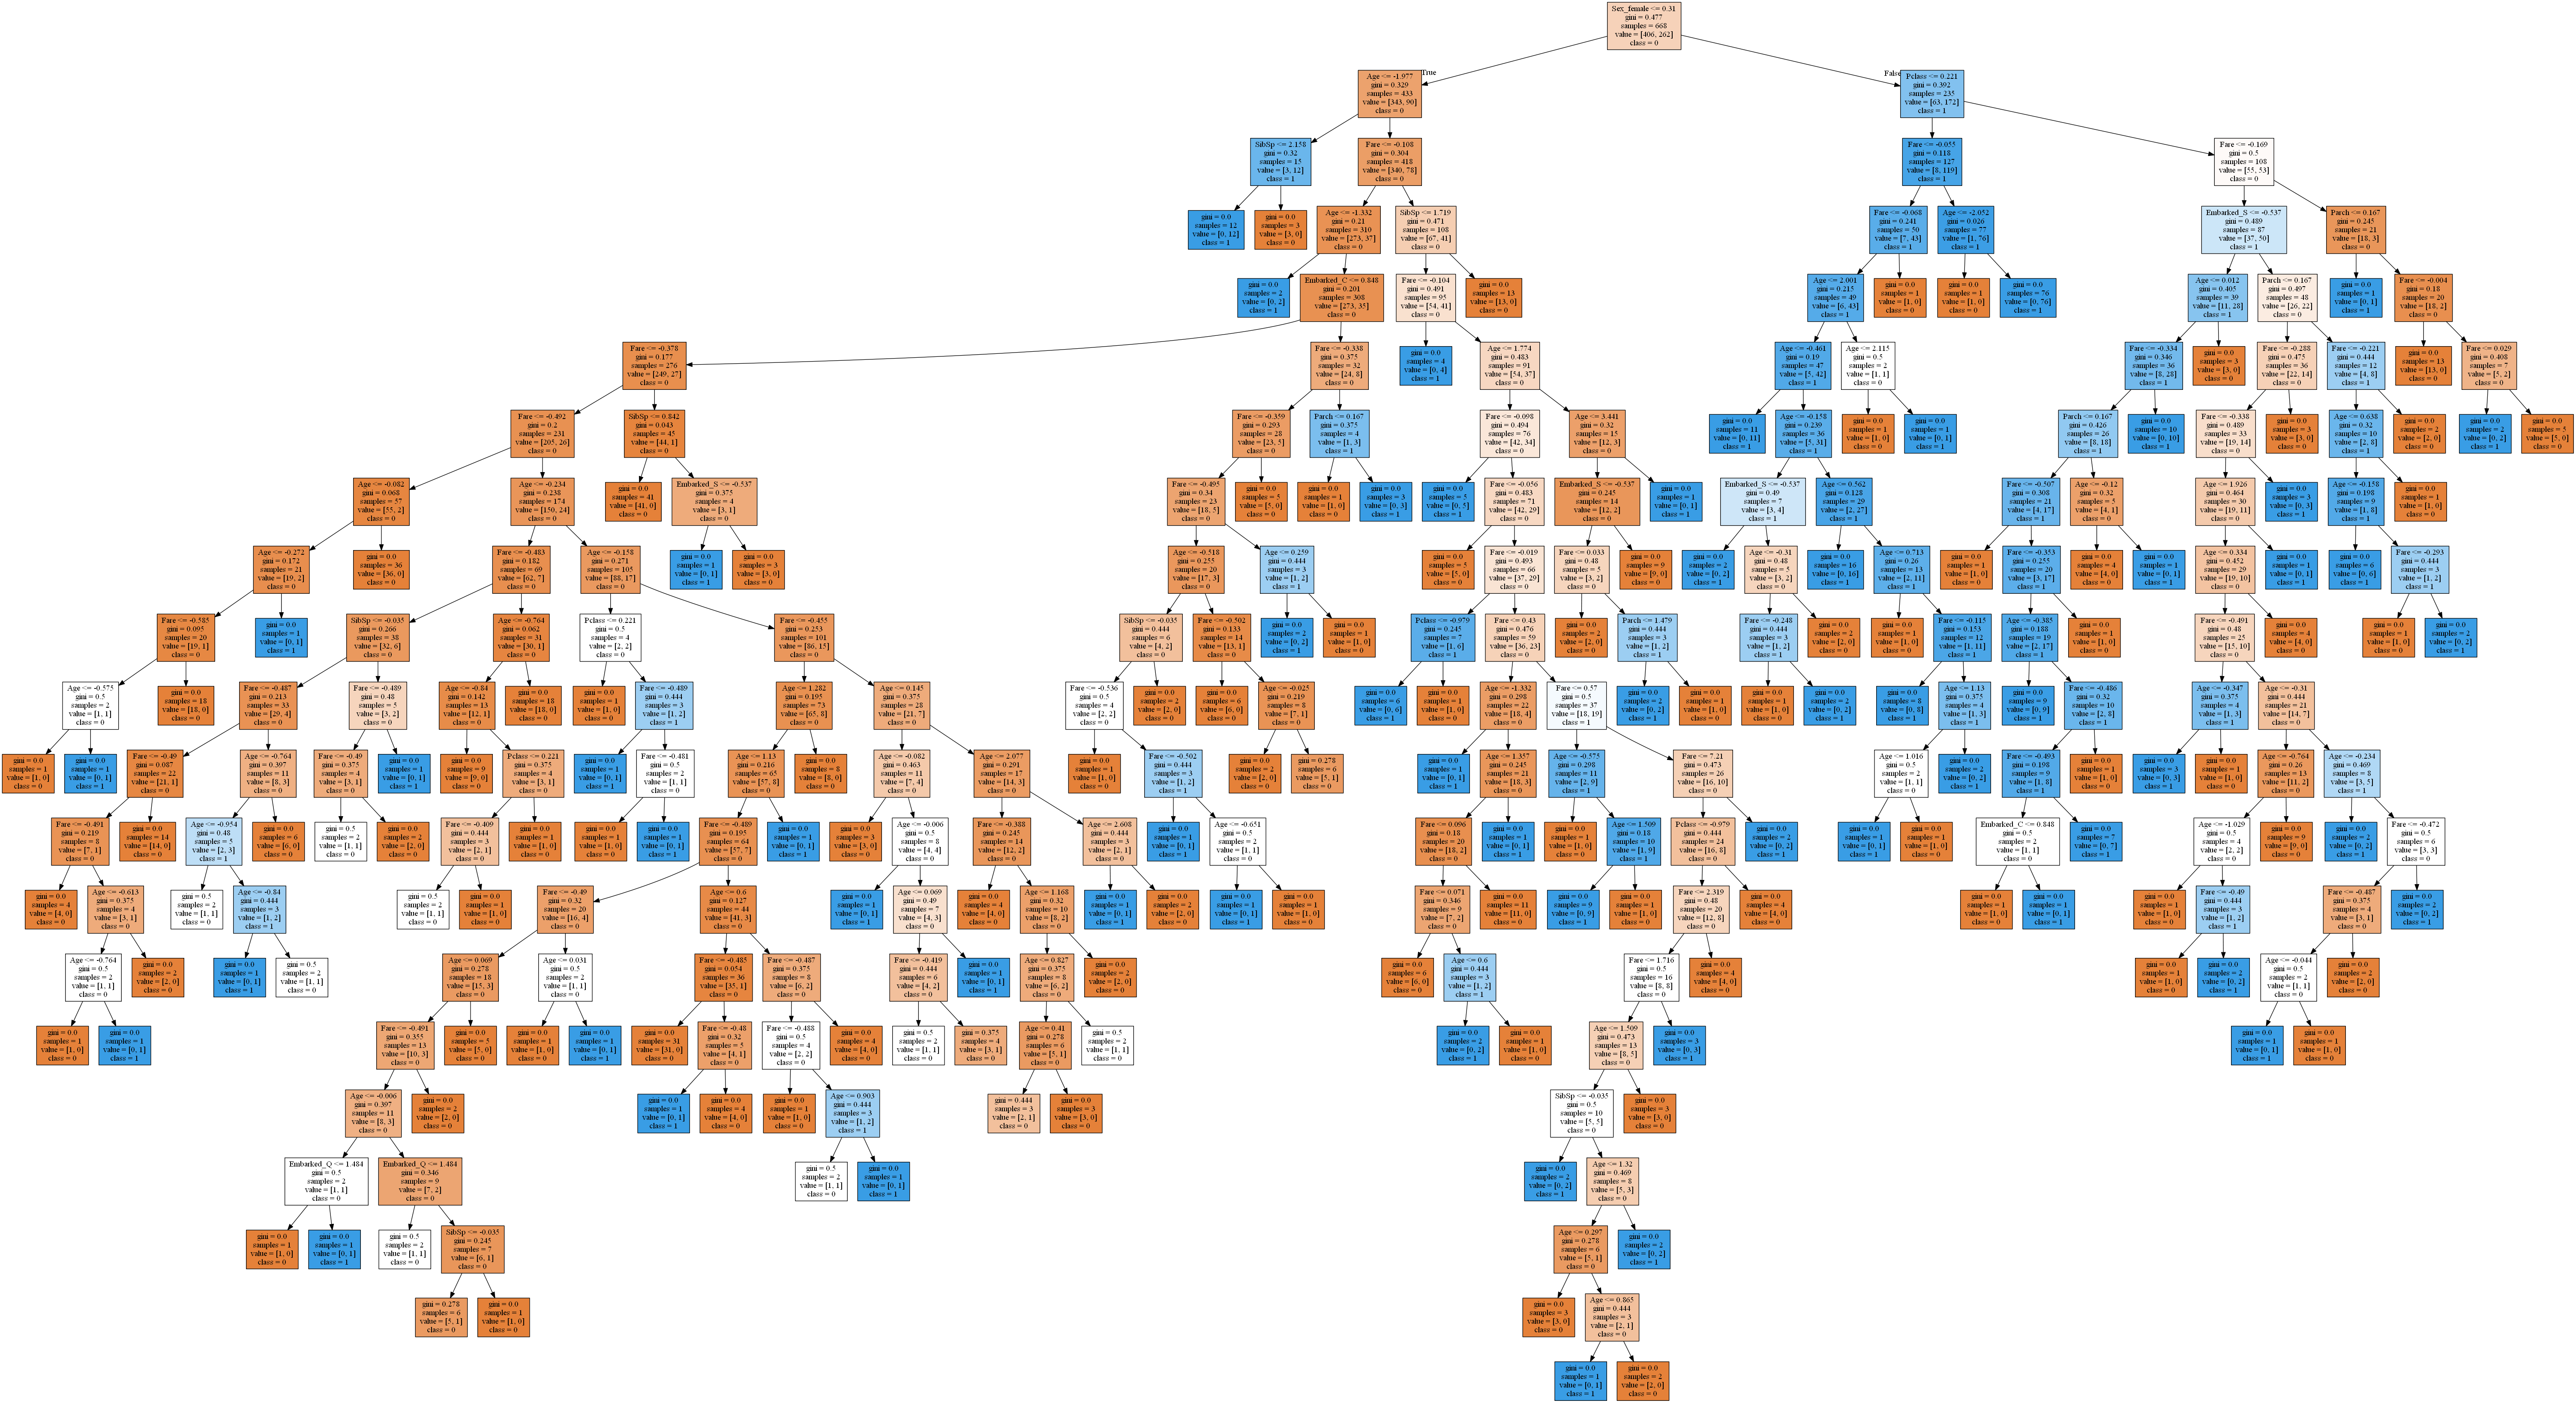

In [31]:
# Create DOT data
dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [32]:
# Saving the tree as PNG
file_path = ("titanic_loans_tree.png")
graph.write_png(file_path)

True